#  Customer Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [3]:
import time
from datetime import date

In [4]:
#import the model from sklearn
from sklearn import linear_model

#import evaluation metrics from sklearn
from sklearn.metrics import mean_squared_error, r2_score

#import TTsplit from sklearn
from sklearn.model_selection import train_test_split

In [5]:
data = pd.read_csv('marketing_customer_analysis.csv')

## ## Customer Analysis - Round 2

In [6]:
data.shape

(10910, 26)

**Standardize column names**

In [7]:
data.rename(columns={'EmploymentStatus':'Employment Status'}, inplace=True)
data.rename(columns={'Unnamed:' ' 0':'unnamed:0'}, inplace=True)

columns = list(map(lambda x: x.strip('').lower().replace(' ','_'), data.columns))

#My first code with for loop
#columns=[]
#for i in range(len(data.columns)):
#    columns.append(data.columns[i].strip('').lower().replace(' ','_'))

#data.columns.lowercase()

data.columns = columns
#data.tail()

**get numerical data**

In [8]:
data_numerical= data._get_numeric_data()
data_numerical.columns

Index(['unnamed:0', 'customer_lifetime_value', 'income',
       'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'total_claim_amount'],
      dtype='object')

**get categorical data**

In [9]:
data_categorical = [column for column in data.columns if data[column].dtype=="O"]
data_categorical

['customer',
 'state',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'employment_status',
 'gender',
 'location_code',
 'marital_status',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'vehicle_class',
 'vehicle_size',
 'vehicle_type']

**making data frame out of nulls and find proportions columns by columns**

In [10]:
nullsdata = pd.DataFrame(round(data.isna().sum()/len(data),4)*100)
nullsdata = nullsdata.rename(columns={'index':'header',0:'proportion_of_nulls'})
#nullsdata

In [11]:
data.isna().all(axis=1).value_counts() # no full Null row.

False    10910
dtype: int64

**deal with nulls, fill categorical data by 'Unknown', numerical data by its mean**

In [12]:
data.drop(['vehicle_type'], axis = 1, inplace = True)  # There are a lot of null entries, so it makes sense just to remove it.

In [13]:
data['state']=data['state'].fillna('Unknown')

In [14]:
data['response']=data['response'].fillna('Unknown')

In [15]:
data['vehicle_class']=data['vehicle_class'].fillna('Unknown')

In [16]:
data['vehicle_size']=data['vehicle_size'].fillna('Unknown')

In [17]:
#data[(data['data['number_of_open_complaints'].isna()].isna() & data['months_since_last_claim'].isna()) == True]
# number of open complaints and months since last claim rows are Null at the same time.

comp_mean = data['number_of_open_complaints'].mean()
data['number_of_open_complaints']=data['number_of_open_complaints'].fillna(comp_mean)

month_mean = data['months_since_last_claim'].mean()
data['months_since_last_claim']=data['months_since_last_claim'].fillna(month_mean)

#data.head()

**making effective_to_date as date time format**

In [18]:
data['effective_to_date'] = pd.to_datetime(data['effective_to_date'],errors = 'coerce')

In [19]:
data['month'] = pd.DatetimeIndex(data['effective_to_date']).month

In [20]:
data['month'] = data['effective_to_date'].dt.strftime('%b')
#data.head()

In [21]:
filtered = data.query("month == ['Jan', 'Feb', 'March']")

if filtered.shape == data.shape:  
    print('This data is just for the first quarter.')

This data is just for the first quarter.


In [22]:
# if it is necessary we can find means of all categorical values.
#means =[]
#for i in data_numerical.columns:
#    means.append(data[i].mean()

#or by using map

means = list(map(lambda x: data[x].mean(), data_numerical.columns))
print(means)

[5454.5, 8018.241093723163, 37536.28478460128, 93.19605866177818, 15.149070740488618, 48.09193400549954, 0.3842561058674663, 2.979193400549954, 434.88832970283863]


## Customer Analysis - Round 3

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   unnamed:0                      10910 non-null  int64         
 1   customer                       10910 non-null  object        
 2   state                          10910 non-null  object        
 3   customer_lifetime_value        10910 non-null  float64       
 4   response                       10910 non-null  object        
 5   coverage                       10910 non-null  object        
 6   education                      10910 non-null  object        
 7   effective_to_date              10910 non-null  datetime64[ns]
 8   employment_status              10910 non-null  object        
 9   gender                         10910 non-null  object        
 10  income                         10910 non-null  int64         
 11  location_code  

In [24]:
data.describe()

,unnamed:0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000
mean,5454.500000,8018.241094,37536.284785,93.196059,15.149071,48.091934,0.384256,2.979193,434.888330
std,3149.590053,6885.081434,30359.195670,34.442532,9.783520,27.940675,0.885589,2.399359,292.180556
min,0.000000,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,2727.250000,4014.453113,0.000000,68.000000,7.000000,24.000000,0.000000,1.000000,271.082527
50%,5454.500000,5771.147235,33813.500000,83.000000,15.000000,48.000000,0.000000,2.000000,382.564630
75%,8181.750000,8992.779137,62250.750000,109.000000,23.000000,71.000000,0.384256,4.000000,547.200000
max,10909.000000,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


<AxesSubplot:>

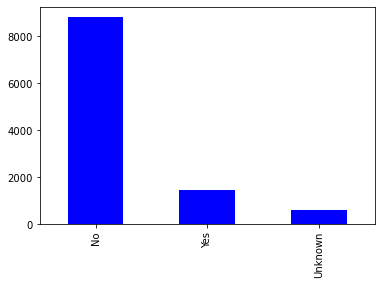

In [25]:
data['response'].value_counts().plot(kind='bar',color='blue')

<AxesSubplot:xlabel='sales_channel', ylabel='count'>

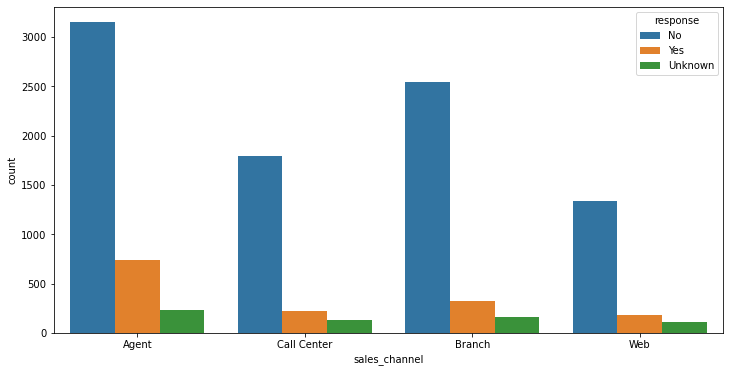

In [26]:
plt.figure(figsize=(12,6))
sns.countplot(x= 'sales_channel',hue='response',data=data)

<AxesSubplot:xlabel='total_claim_amount', ylabel='response'>

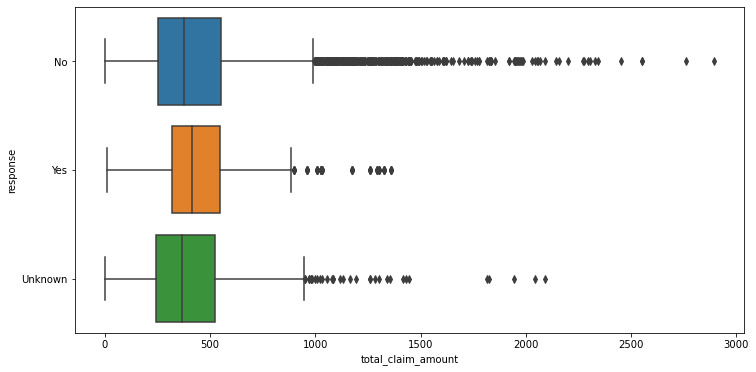

In [27]:
plt.figure(figsize=(12,6))
sns.boxplot(x="total_claim_amount", y="response", data=data)

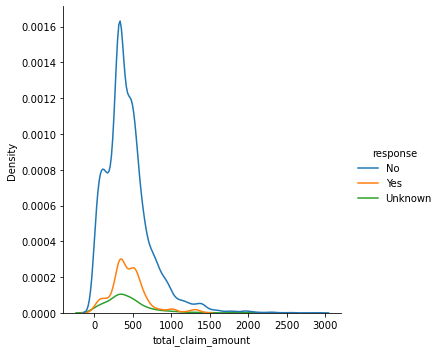

In [28]:
sns.displot(x='total_claim_amount', data= data, hue='response', kind='kde')

<AxesSubplot:xlabel='income', ylabel='response'>

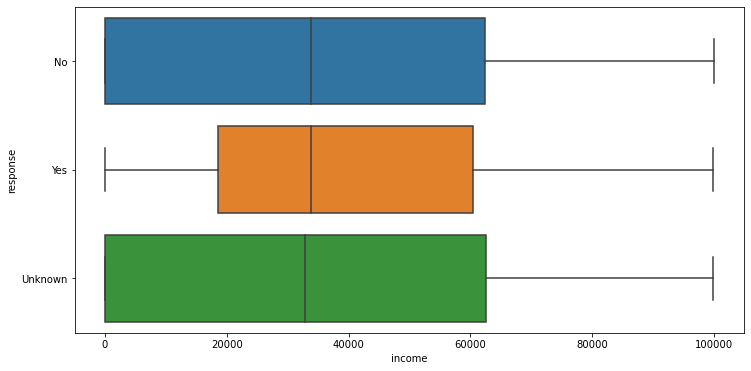

In [29]:
plt.figure(figsize=(12,6))
sns.boxplot(x="income", y="response", data=data)

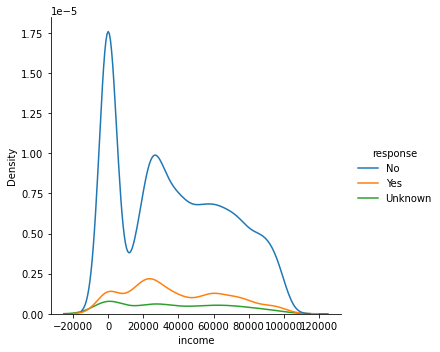

In [30]:
sns.displot(x='income', data= data, hue='response', kind='kde')

<AxesSubplot:xlabel='income', ylabel='total_claim_amount'>

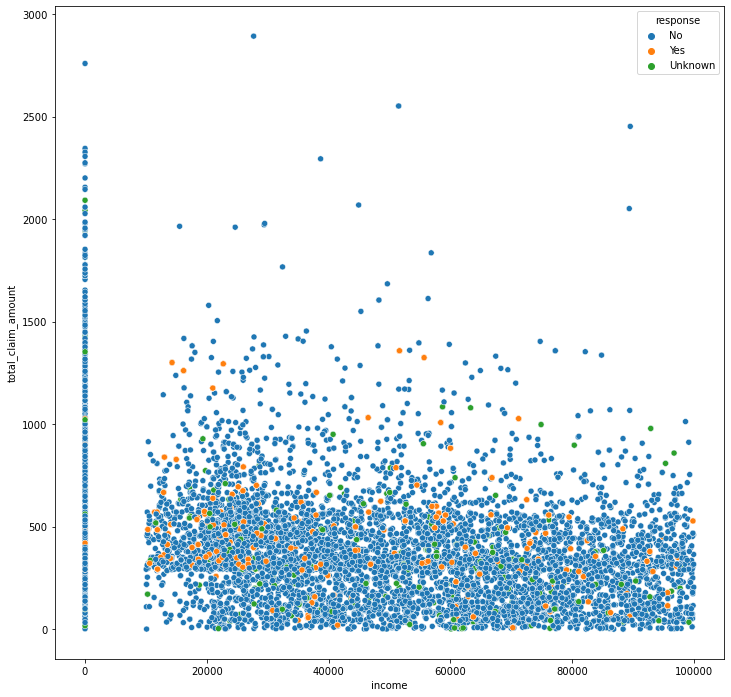

In [31]:
plt.figure(figsize=(12,12))
sns.scatterplot(data=data, x="income", y="total_claim_amount",hue='response')

## Customer Analysis - Round 4

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   unnamed:0                      10910 non-null  int64         
 1   customer                       10910 non-null  object        
 2   state                          10910 non-null  object        
 3   customer_lifetime_value        10910 non-null  float64       
 4   response                       10910 non-null  object        
 5   coverage                       10910 non-null  object        
 6   education                      10910 non-null  object        
 7   effective_to_date              10910 non-null  datetime64[ns]
 8   employment_status              10910 non-null  object        
 9   gender                         10910 non-null  object        
 10  income                         10910 non-null  int64         
 11  location_code  

In [33]:
numerical = data._get_numeric_data()
numerical


,unnamed:0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0,4809.216960,48029,61,7.000000,52,0.000000,9,292.800000
1,1,2228.525238,0,64,3.000000,26,0.000000,1,744.924331
2,2,14947.917300,22139,100,34.000000,31,0.000000,2,480.000000
3,3,22332.439460,49078,97,10.000000,3,0.000000,2,484.013411
4,4,9025.067525,23675,117,15.149071,31,0.384256,7,707.925645
...,...,...,...,...,...,...,...,...,...
10905,10905,15563.369440,0,253,15.149071,40,0.384256,7,1214.400000
10906,10906,5259.444853,61146,65,7.000000,68,0.000000,6,273.018929
10907,10907,23893.304100,39837,201,11.000000,63,0.000000,2,381.306996
10908,10908,11971.977650,64195,158,0.000000,27,4.000000,6,618.288849


In [34]:
data_categorical = [column for column in data.columns if data[column].dtype=="O"]

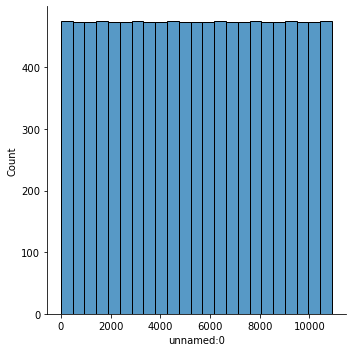

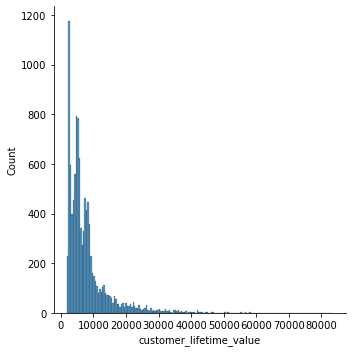

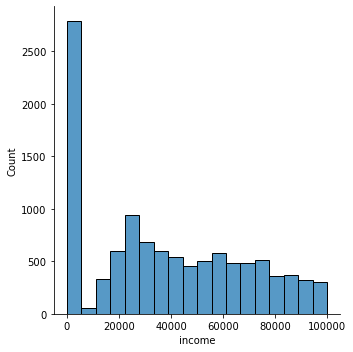

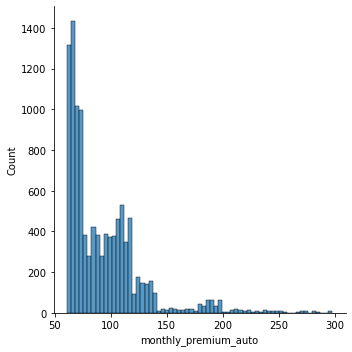

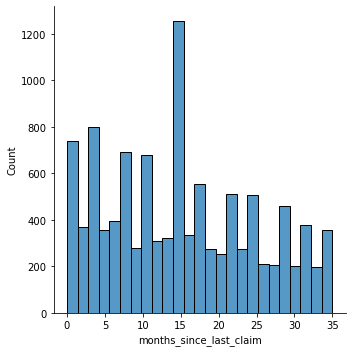

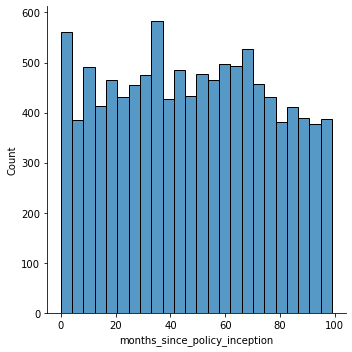

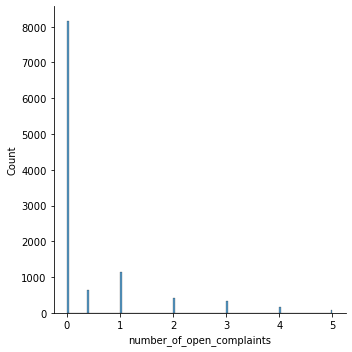

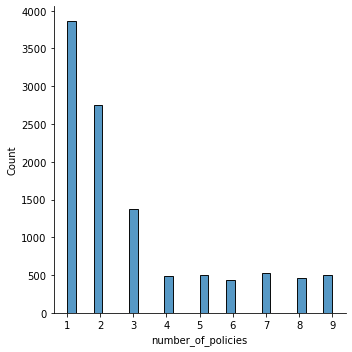

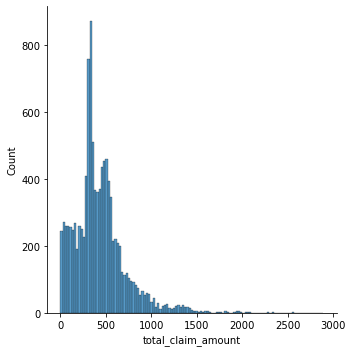

In [35]:
for x in numerical.columns:
    sns.displot(data,x = x)


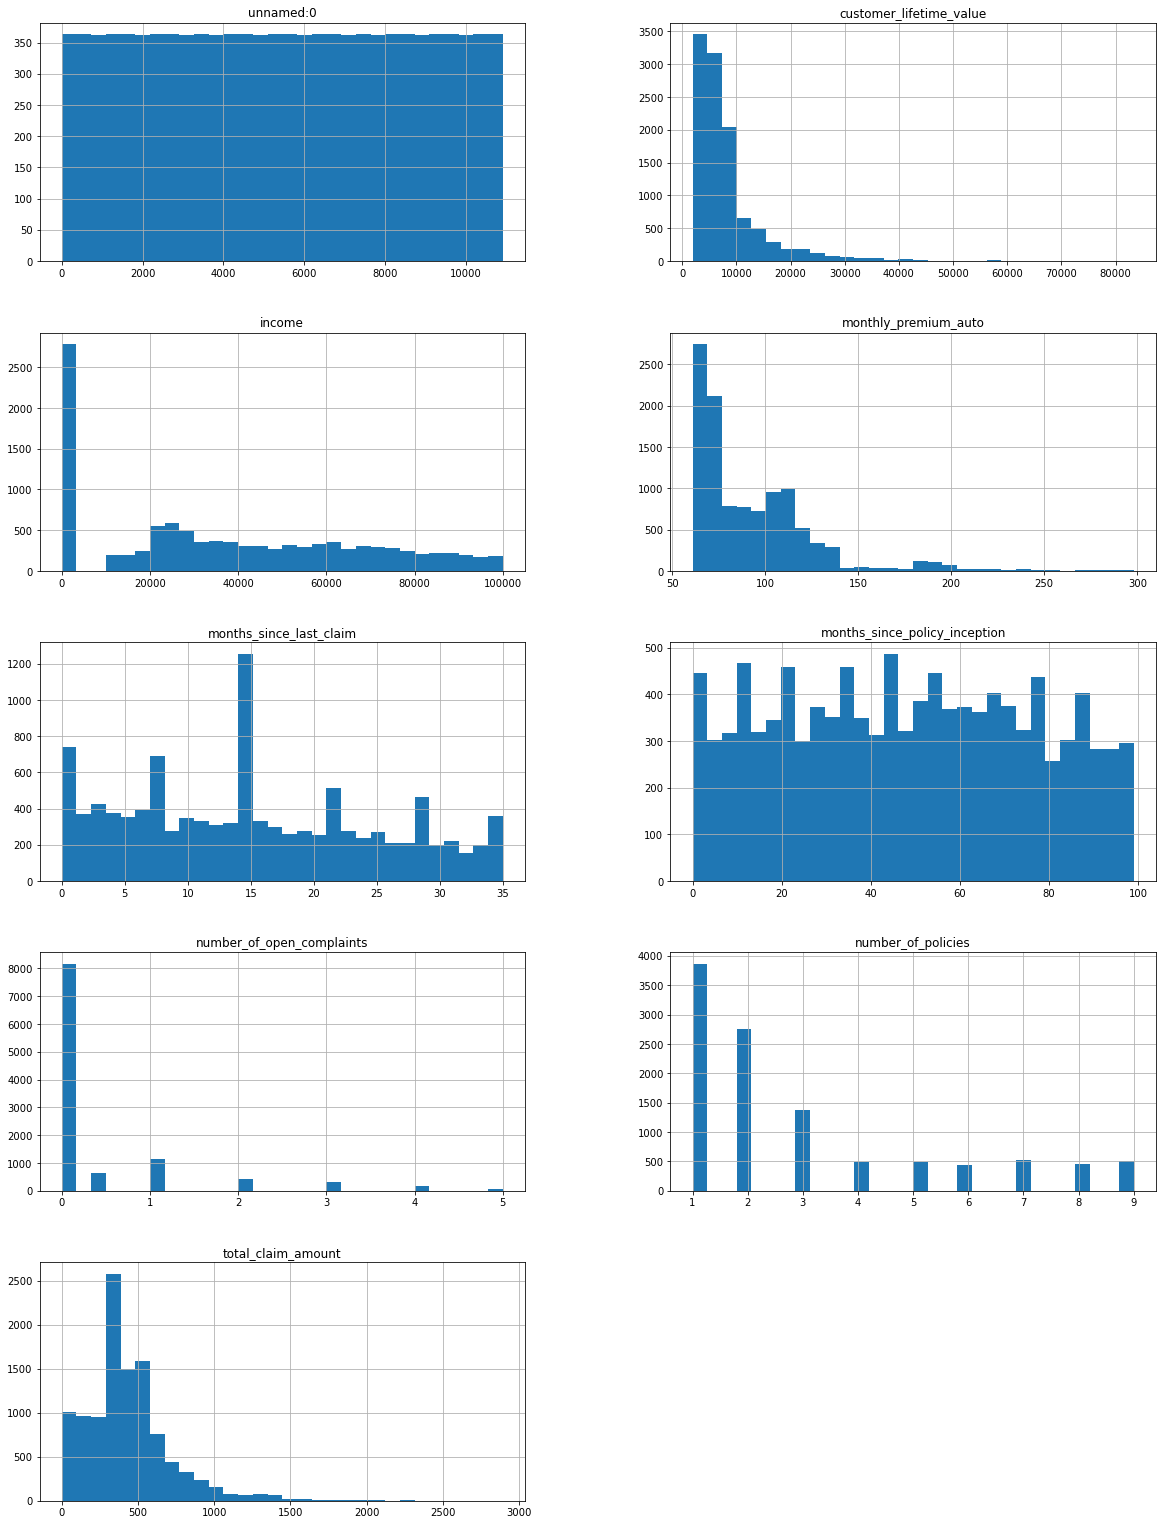

In [36]:
numerical.hist(bins=30, figsize=(20, 50), layout=(9, 2));

Do the distributions for different numerical variables look like a normal distribution? 
Answer : No, they don't.

In [37]:
corr_data = numerical
correlations_matrix = corr_data.corr()
correlations_matrix

,unnamed:0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
unnamed:0,1.000000,0.001355,0.008910,0.000863,0.007722,0.012795,0.007108,0.002319,-0.000593
customer_lifetime_value,0.001355,1.000000,0.028306,0.403069,0.015683,0.016960,-0.031501,0.016024,0.232626
income,0.008910,0.028306,1.000000,-0.009788,-0.023126,-0.005903,0.006956,-0.009960,-0.354141
monthly_premium_auto,0.000863,0.403069,-0.009788,1.000000,0.008504,0.018953,-0.010066,-0.020505,0.631799
months_since_last_claim,0.007722,0.015683,-0.023126,0.008504,1.000000,-0.038155,0.002246,0.007425,0.012728
months_since_policy_inception,0.012795,0.016960,-0.005903,0.018953,-0.038155,1.000000,0.004247,-0.009123,0.003095
number_of_open_complaints,0.007108,-0.031501,0.006956,-0.010066,0.002246,0.004247,1.000000,0.003964,-0.011025
number_of_policies,0.002319,0.016024,-0.009960,-0.020505,0.007425,-0.009123,0.003964,1.000000,-0.008923
total_claim_amount,-0.000593,0.232626,-0.354141,0.631799,0.012728,0.003095,-0.011025,-0.008923,1.000000


<AxesSubplot:>

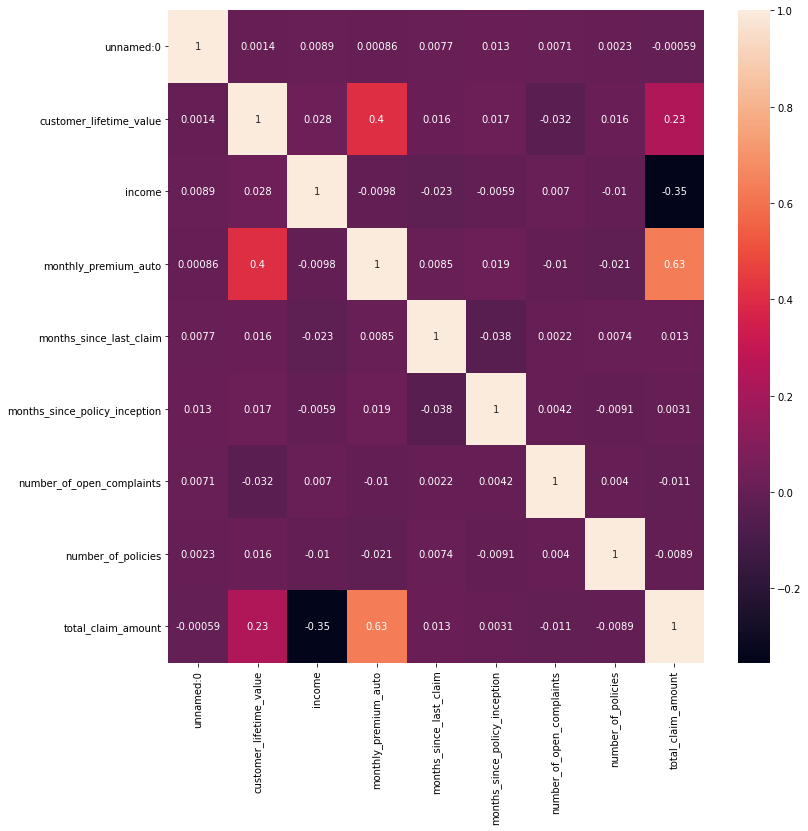

In [38]:
plt.figure(figsize=(12,12))
sns.heatmap(correlations_matrix,annot= True)

## Customer Analysis + Prediction + Evaluation

- Aim is to predict the insurance claim amount.
Dealing with outliers. Normalization - ie use chosen scaler to transform selected columns into normal distribution as needed for linear regression model. Propose: MinMax scaler on 'effective_to_date' and standard scaler on numerical columns.

Encoding Categorical Data fields using OHE.

Bring categorical and numerical columns back together using pd.concat.

Define X and y, the y value you are seeking to predict is claim amount.

Splitting into train set and test dataset using random state, eg 80%:20% .

In [39]:
data['effective_to_date'] = data['effective_to_date'].apply(lambda x: x.toordinal())

### Dealing with outliers

In [40]:
new_data = data.drop(['number_of_open_complaints','unnamed:0','months_since_policy_inception','number_of_policies','month','customer'],axis = 1) #independent variables /features
new_numerical = new_data._get_numeric_data()

for x in new_numerical.columns:
    q_1 = np.percentile(new_data[x],25)
    q_3 = np.percentile(new_data[x],75)
    iqr = q_3 - q_1
    
    lower_limit = q_1-(1.5)*iqr
    upper_limit = q_3+(1.5)*iqr
    number_of_lower_outliers = len(new_data[new_data[x]<lower_limit])
    number_of_upper_outliers = len(new_data[new_data[x]> upper_limit])
    print('The number of lower outliers of data[{}] is {}.'.format(x,number_of_lower_outliers))
    print('The number of upper outliers of data[{}] is {}.'.format(x,number_of_upper_outliers))
    new_data = new_data[(new_data[x] >= lower_limit) & (new_data[x]<= upper_limit)]
    print(new_data.shape)

The number of lower outliers of data[customer_lifetime_value] is 0.
The number of upper outliers of data[customer_lifetime_value] is 984.
(9926, 20)
The number of lower outliers of data[effective_to_date] is 0.
The number of upper outliers of data[effective_to_date] is 0.
(9926, 20)
The number of lower outliers of data[income] is 0.
The number of upper outliers of data[income] is 0.
(9926, 20)
The number of lower outliers of data[monthly_premium_auto] is 0.
The number of upper outliers of data[monthly_premium_auto] is 362.
(9564, 20)
The number of lower outliers of data[months_since_last_claim] is 0.
The number of upper outliers of data[months_since_last_claim] is 0.
(9564, 20)
The number of lower outliers of data[total_claim_amount] is 0.
The number of upper outliers of data[total_claim_amount] is 281.
(9283, 20)


In [41]:
y = new_data['total_claim_amount']

In [42]:
X = new_data.drop(['total_claim_amount'],axis = 1) #independent variables /features

In [43]:
X_num = X.select_dtypes(include = np.number)  
X_num.head()
X_num.shape

(9283, 5)

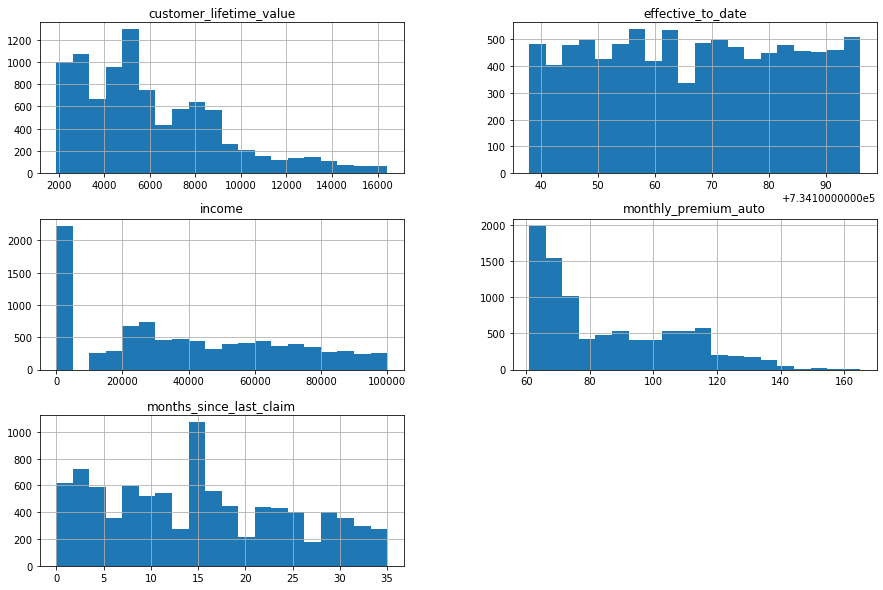

In [44]:
X.hist(bins=20,figsize=(15, 10), layout=(3, 2));

In [45]:
X_cat = X.select_dtypes(include = np.object)
X_cat.head()

,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize
1,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize
2,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize
4,Oregon,No,Premium,Bachelor,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize
5,Unknown,Unknown,Basic,High School or Below,Employed,M,Suburban,Divorced,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize


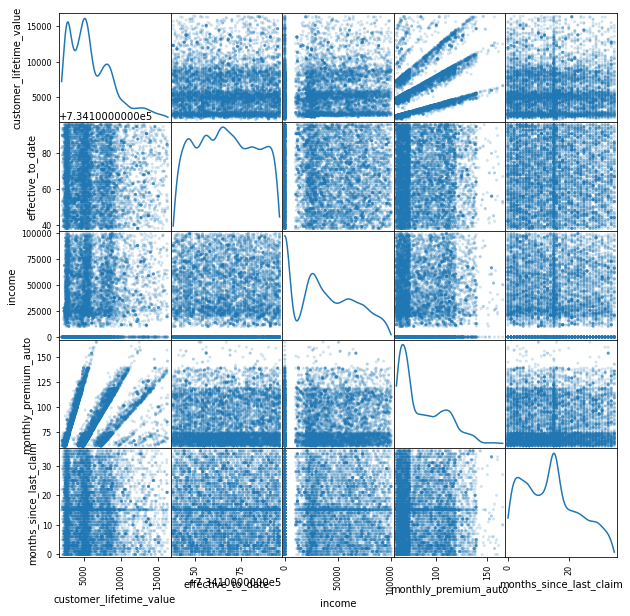

In [46]:
from pandas.plotting import scatter_matrix
#plt.figure(figsize=(25,25))
scatter_matrix(X_num,alpha=0.2,figsize=(10,10),diagonal='kde');

### StandardScaler for Numerical Data

In [47]:
X_num = X_num.drop(['effective_to_date'],axis=1)
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(X_num)
X_standardised= transformer.transform(X_num)
X_num

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim
0,4809.216960,48029,61,7.000000
1,2228.525238,0,64,3.000000
2,14947.917300,22139,100,34.000000
4,9025.067525,23675,117,15.149071
5,4745.181764,50549,61,2.000000
...,...,...,...,...
10901,4547.892543,33531,116,11.000000
10902,3579.023825,28304,91,10.000000
10903,2771.663013,59855,74,30.000000
10906,5259.444853,61146,65,7.000000


(9283, 4)

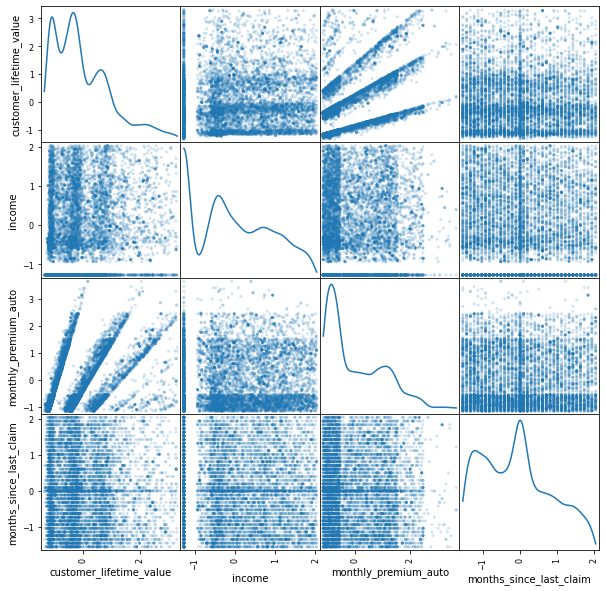

In [48]:
X_std=pd.DataFrame(X_standardised, columns= X_num.columns)
scatter_matrix(X_std,alpha=0.2,figsize=(10,10),diagonal='kde');
X_std.shape

### MinMaxScaler for 'effective_to_date'

In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X[['effective_to_date']])
date_minmax = scaler.transform(X[['effective_to_date']])

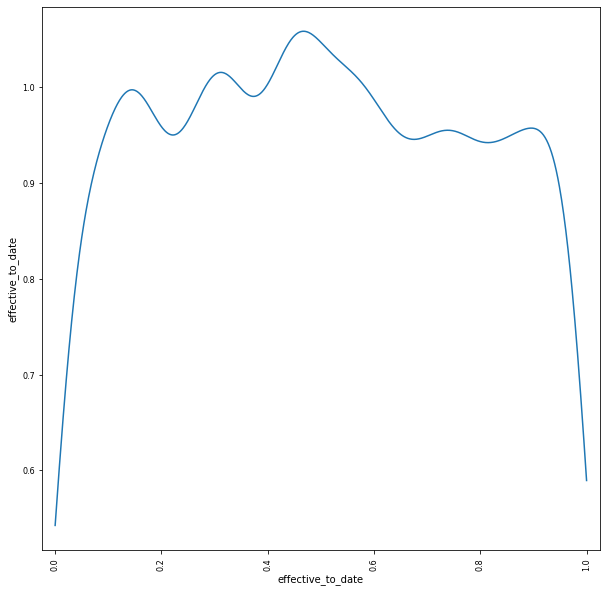

In [50]:
date_MinMax = pd.DataFrame(date_minmax, columns= ['effective_to_date'])
scatter_matrix(date_MinMax,alpha=0.2,figsize=(10,10),diagonal='kde');

### Encoding Categorical Data fields using OHE

In [51]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='error').fit(X_cat)
ohe = encoder.transform(X_cat).toarray()

In [52]:
ohedf = pd.DataFrame(ohe)
ohedf

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9278,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
9279,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9280,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
9281,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [53]:
newdata=pd.concat([ohedf,date_MinMax,X_std],axis=1)
newdata.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,effective_to_date,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.827586,-0.407054,0.315511,-1.143372,-0.827208
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.293103,-1.235429,-1.268956,-1.004858,-1.238455
2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.689655,2.847365,-0.538595,0.657312,1.948710
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.275862,0.946191,-0.487923,1.442225,0.010613
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.758621,-0.427608,0.398645,-1.143372,-1.341267


### Train - Test Split

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(newdata,y, test_size=0.2, random_state=100)

In [55]:
X_train.shape

(7426, 64)

In [56]:
X_test.shape

(1857, 64)

### Model

In [57]:
from sklearn import linear_model 
from sklearn.metrics import r2_score, mean_squared_error 

In [58]:
lm=linear_model.LinearRegression()

In [59]:
#set up model and train it 
model=lm.fit(X_train,y_train)
#get the predictions on X test 
predictions=lm.predict(X_test)

In [60]:
#evaluate how good our predictions are 
r2_score(y_test,predictions)

# this is how much of the variation the model explains

0.7834746275930209

* The predicted total claim amount is 78% accurate with the test data.

In [61]:
mean_squared_error(y_test,predictions)


8619.734434490876

In [62]:
root_mean_squared = (mean_squared_error(y_test, predictions))**(1/2)
root_mean_squared

92.8425249252242

In [63]:
data.describe()

,unnamed:0,customer_lifetime_value,effective_to_date,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000
mean,5454.500000,8018.241094,734166.951421,37536.284785,93.196059,15.149071,48.091934,0.384256,2.979193,434.888330
std,3149.590053,6885.081434,16.932418,30359.195670,34.442532,9.783520,27.940675,0.885589,2.399359,292.180556
min,0.000000,1898.007675,734138.000000,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,2727.250000,4014.453113,734153.000000,0.000000,68.000000,7.000000,24.000000,0.000000,1.000000,271.082527
50%,5454.500000,5771.147235,734167.000000,33813.500000,83.000000,15.000000,48.000000,0.000000,2.000000,382.564630
75%,8181.750000,8992.779137,734182.000000,62250.750000,109.000000,23.000000,71.000000,0.384256,4.000000,547.200000
max,10909.000000,83325.381190,734196.000000,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678
